In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import BarycentricInterpolator
import sympy as sp
sp.init_printing()
import math as mt
import pandas as pd
import urllib.request
import random as rd
from scipy.interpolate import CubicHermiteSpline

# Actividad 04: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

# 1a
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},
Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.



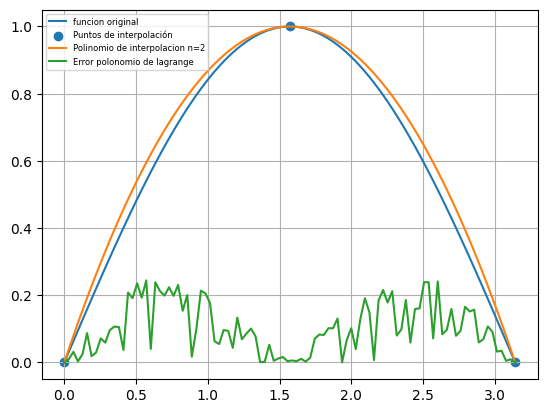

In [ ]:
#lagrange?
#Definimos x como una variable simbolica para hacer derivadas luego
x = sp.symbols('x', real=True)
#Puntos de interpolación
p = np.array([0, np.pi/2, np.pi])
#Dominio para graficar
domain = np.linspace(0, np.pi, 100)
#Función para obtener los valores evaluados de los puntos de interpolación
y = np.sin(p)
#polinomio de lagrange
f = lagrange(p, y)
#Derivada del seno para obetener la función de error
e = sp.diff(sp.sin(x),x,3)
#función para calcular el error en cada punto del intervalo
def err(e, n, x_val):
  resto = (1/mt.factorial(n+1))*e.subs(x, rd.uniform(0, np.pi))*(x_val-p[0])*(x_val-p[1])*(x_val-p[2])
  return resto
#Evaluamos la función del error en los valores del dominio
resto = np.abs([err(e,2,x_val) for x_val in domain])
#Graficas
plt.plot(domain, np.sin(domain), label = 'funcion original')
plt.scatter(p, y, label='Puntos de interpolación')
plt.plot(domain,f(domain), label='Polinomio de interpolacion n=2')
plt.plot(domain, resto, label='Error polonomio de lagrange')
plt.legend(prop={'size': 6},loc='upper left')
plt.grid()
plt.show()


# 1b
Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

In [ ]:
sp.hermite?

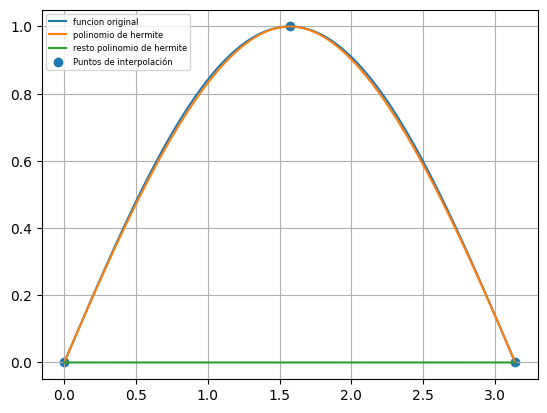

In [ ]:
x = sp.symbols('x', real=True)
x_point = np.array([0, np.pi/2, np.pi])
y_point = np.sin(x_point)
y_point_der = [sp.diff(sp.sin(x),x).subs(x, val) for val in x_point]
domain = np.linspace(0 , np.pi , 100)
y = sp.sin(x)

f = CubicHermiteSpline(x_point, y_point, y_point_der)
#Para calcular el erro hacemos:
def err(n, x_point):
  f_1 = 1
  for i in range(n):
    f_1 *= (x - x_point[i])**2

  dif_n_f = sp.diff(sp.sin(x), x, 2*n +2).subs(x, rd.uniform(0, np.pi))
  e = (1/mt.factorial(2*n +2))*dif_n_f*f_1
  return e

resto = np.abs(err(len(x_point), x_point))
#Graficamos
plt.plot(domain, np.sin(domain), label = 'funcion original')
plt.plot(domain, f(domain), label='polinomio de hermite')
plt.plot(domain, [resto.subs(x, val) for val in domain], label = 'resto polinomio de hermite')
plt.scatter(x_point, y_point, label='Puntos de interpolación')
plt.legend(prop={'size': 6},loc='upper left')
plt.grid()
plt.show()


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el error asociado a cada uno de ellos. ¿Cuál será el mejor?

In [3]:
#función original
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
x = sp.symbols('x', real=True)
eq = sp.Eq(10.6, x/((-78)**2 + (55**2)/4) )
sol_sig = sp.solve(eq, x)


sigma_e =  sp.simplify(sol_sig[0]/((x-78)**2 + (55**2)/4))
sigma_e_prime = sp.diff(sigma_e, x)

y_point_der = [sigma_e_prime.subs(x, val) for val in Energia]
sigma_e
sol_sig[0]

72506.6499999998

In [4]:
#polinomio de hermite

f = CubicHermiteSpline(Energia, sigma_exp, y_point_der)



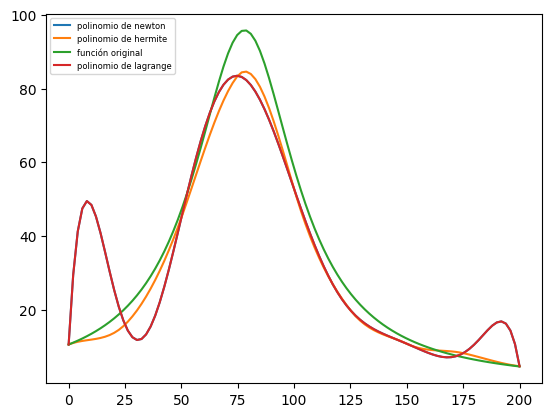

In [6]:


#polinomio de newton
poli_n = BarycentricInterpolator(Energia,sigma_exp)
#polinomio de lagrange
lg = lagrange(Energia, sigma_exp)
domain = np.linspace(min(Energia), max(Energia), 100)
plt.plot(domain, poli_n(domain), label='polinomio de newton')
plt.plot(domain, f(domain), label='polinomio de hermite')
plt.plot(domain, [sigma_e.subs(x, val) for val in domain], label='función original')
plt.plot(domain, lg(domain), label='polinomio de lagrange')
plt.legend(prop={'size': 6},loc='upper left')
plt.show()
poli_n

In [7]:
#Calculamos los errores, para newton y lagrange, usamos los mismos metodos, para hermite usamos el que aplicamos en el primer punto
e = sp.diff(sigma_e,x,len(Energia))
def err_n(e, n, x_val):
  p1 = 1
  for i in range(n):
    p1 *= (x_val-Energia[i])
  resto = (1/mt.factorial(n+1))*e.subs(x, rd.uniform(0, 200))*p1
  return resto
#Evaluamos la función del error en los valores del dominio
resto_n = [err_n(e,len(Energia)-1, x_val) for x_val in domain]
#Como el error para el de lagrange y newton se calcula de la misma manera entonces tienen el mismo error, en la grafica también se aprecia que tienen el mismo trazo
def err_h(n, Energia, x_val):
    f_1 = 1
    for i in range(n):
        f_1 *= (x_val - Energia[i])**2  # Polinomio nodal al cuadrado
    # Derivada de orden 2n+2
    dif_n_f = sp.diff(sigma_e, x, (2 * n) + 2).subs(x, rd.uniform(0, 200))
    # Calcular el término del error
    e = (1 / mt.factorial((2 * n) + 2)) * dif_n_f * f_1
    return sp.simplify(e)

resto_h = [err_h(len(Energia), Energia, x_val) for x_val in domain]

KeyboardInterrupt: 

In [1]:
#Graficamos los errores
plt.plot(domain, np.abs(resto_h.subs), label='Error polonomio de hermite')
plt.legend()
plt.show()
plt.plot(domain, np.abs(resto_n), label='Error polinomio de lagrange y newton')
plt.legend()
plt.show()
#Los dos polinomios son bastante malos, sin embargo el polinomio de newton y lagrange es dos ordenes de magnitud más impreciso
#en los bordes de la función que el polinomio de hermit, por lo tanto este es mejor

NameError: name 'plt' is not defined

#3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

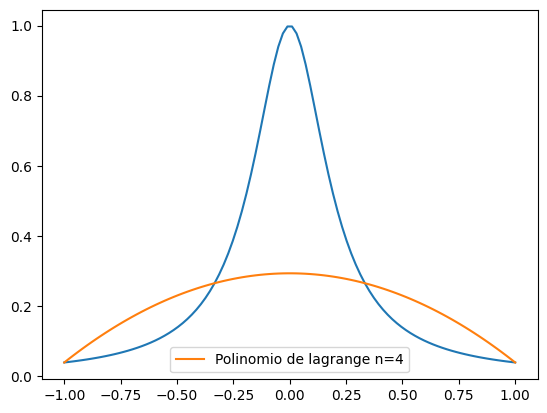

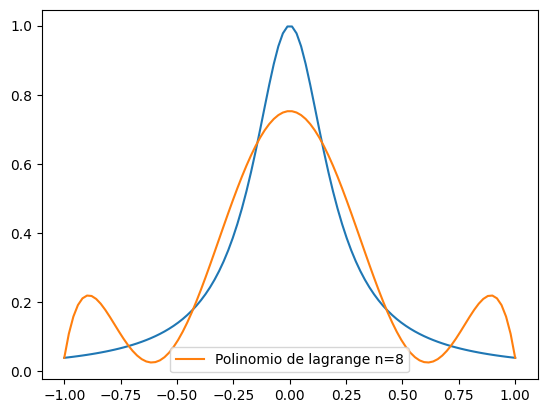

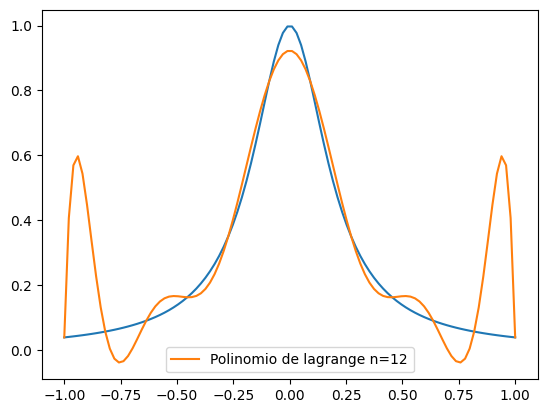

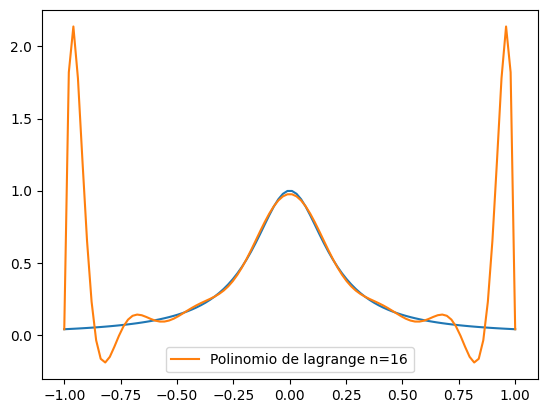

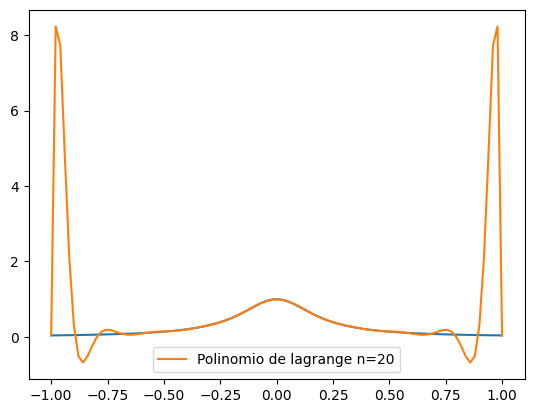

In [8]:
x_point = ([4, 8,12,16,20])
x = sp.symbols('x', real=True)
f = 1/(1+(25*x**2))
dominio = np.linspace(-1,1, 100)
def poli_lg(n, f):
  poli_n = []
  for i in range(n):
    plt.figure()
    x_points = np.linspace(-1,1, x_point[i])
    poli_n.append(lagrange(x_points, [f.subs(x,p) for p in x_points]))
    plt.plot(dominio, [f.subs(x,val) for val in dominio])
    plt.plot(dominio, poli_n[i](dominio), label='Polinomio de lagrange n='+str(x_point[i]))
    plt.legend()
  return poli_n
poli = poli_lg(len(x_point), f)




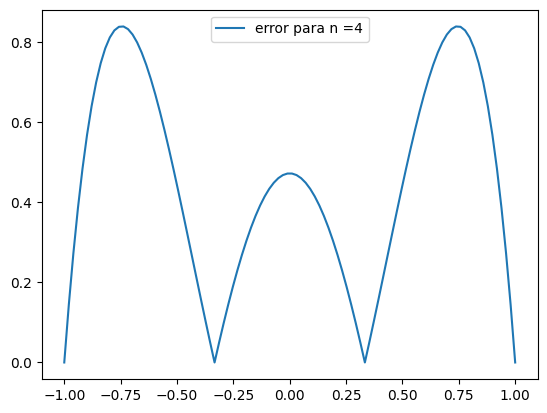

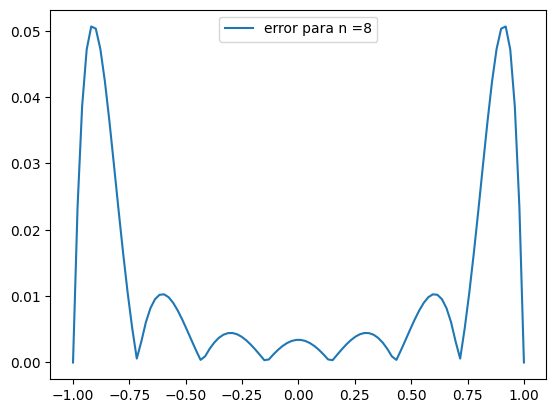

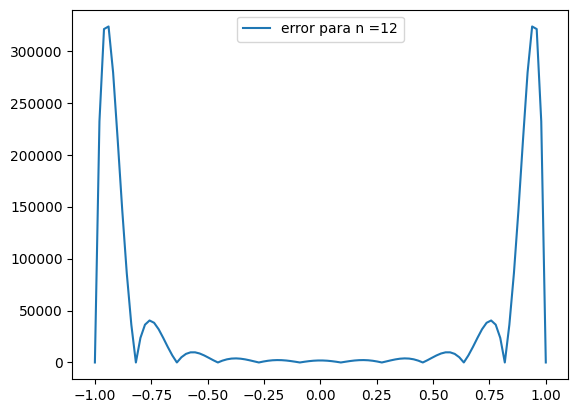

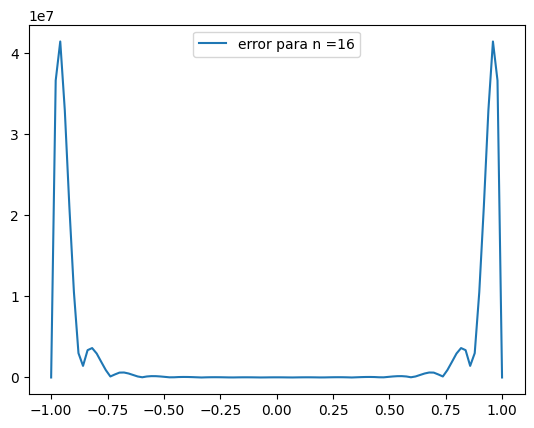

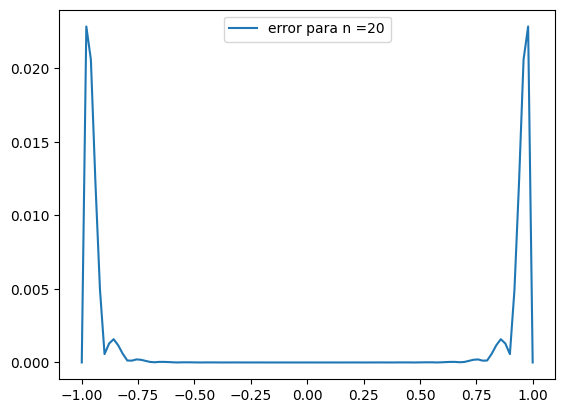

In [9]:

def poli_e(n,f):
  poli_n = []
  for i in range(n):
    e_2 = 1
    plt.figure()
    x_points =np.linspace(-1,1, x_point[i])
    e_1  = sp.diff(f,x, x_point[i]).subs(x, rd.uniform(-1,1))
    for j in range(len(x_points)):
      e_2 *= (x - x_points[j])
    poli_n.append((1/mt.factorial(x_point[i]))*e_1*e_2)
    #Graficamos cada error
    plt.plot(dominio, np.abs([poli_n[i].subs(x, x_val) for  x_val in dominio]),  label='error para n ='+str(x_point[i]))
    plt.legend()
  return poli_n
e = poli_e(len(x_point), f)
plt.show()


In [10]:

def poli_e(n,f):
  poli_n = []
  e_2 = 1
  x_points =np.linspace(-1,1, 4)
  e_1  = sp.diff(f,x, 4).subs(x, rd.uniform(-1,1))
  for j in range(len(x_points)):
    e_2 *= (x - x_points[j])
  poli_n.append((1/mt.factorial(4))*e_1*e_2)
  return np.abs(poli_n[0].subs(x, 0.5))
e = poli_e(4, f)
print(f"Error cuando x = 0.5 y n = 4: {e}")

Error cuando x = 0.5 y n = 4: 5.06748370733395


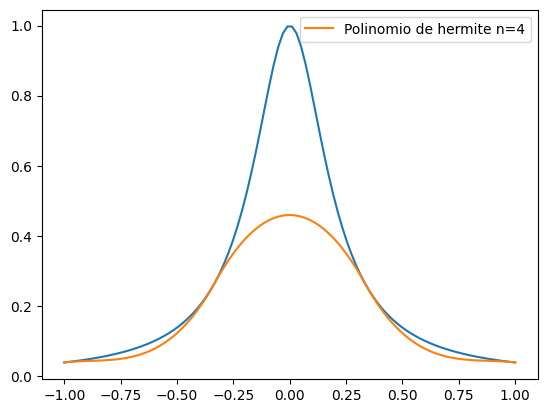

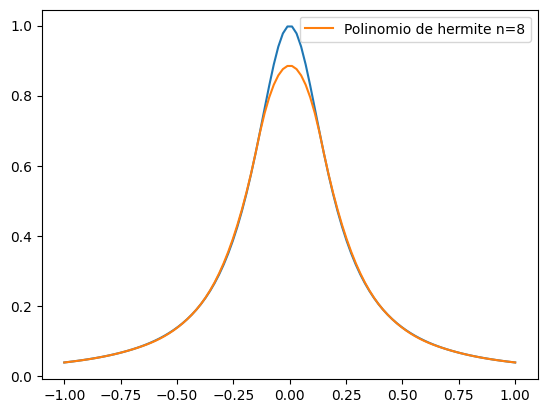

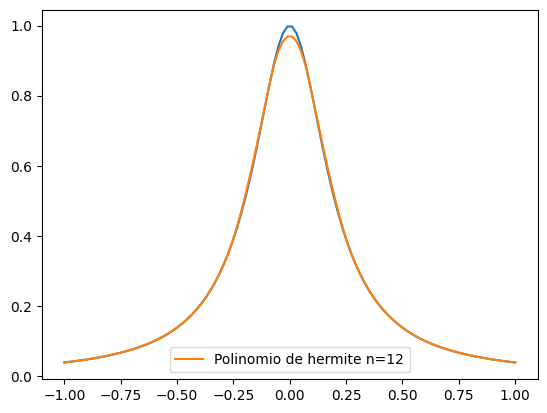

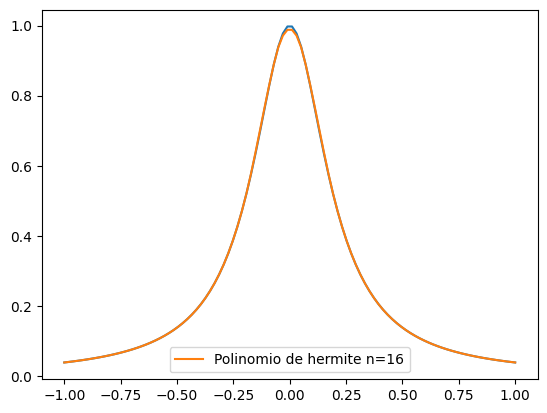

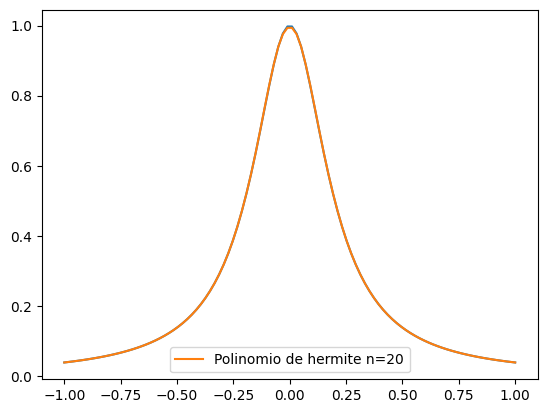

In [11]:
x_point = ([4, 8,12,16,20])
x = sp.symbols('x', real=True)
f = 1/(1+(25*x**2))
f_prime = sp.diff(f,x)
dominio = np.linspace(-1,1, 100)
def poli_lg(n, f):
  poli_n = []
  for i in range(n):
    plt.figure()
    x_points = np.linspace(-1,1, x_point[i])
    poli_n.append(CubicHermiteSpline(x_points, [f.subs(x,p) for p in x_points], [f_prime.subs(x, p) for p in x_points]))
    plt.plot(dominio, [f.subs(x,val) for val in dominio])
    plt.plot(dominio, poli_n[i](dominio), label='Polinomio de hermite n='+str(x_point[i]))
    plt.legend()
  return poli_n
poli = poli_lg(len(x_point), f)




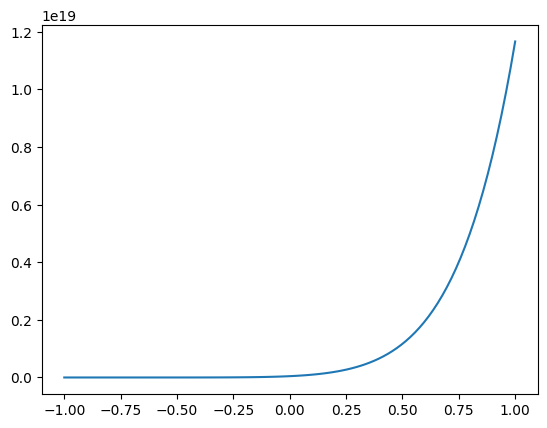

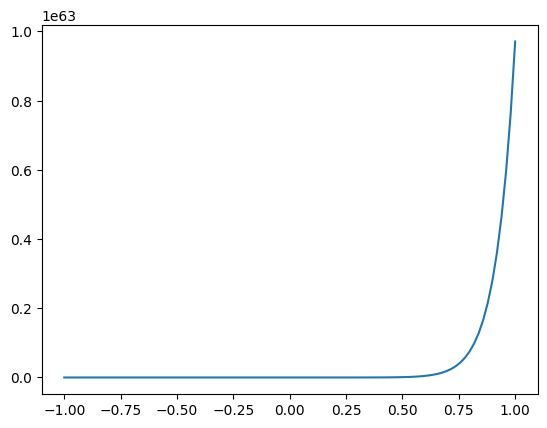

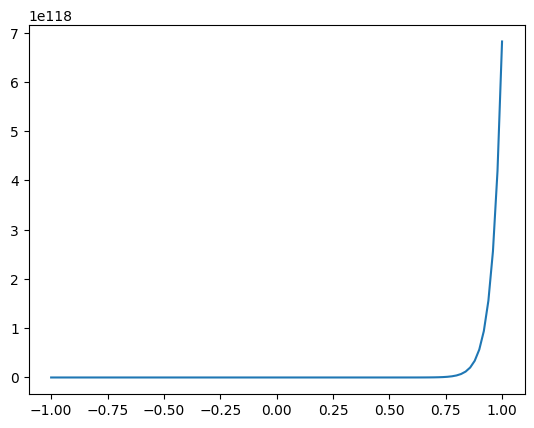

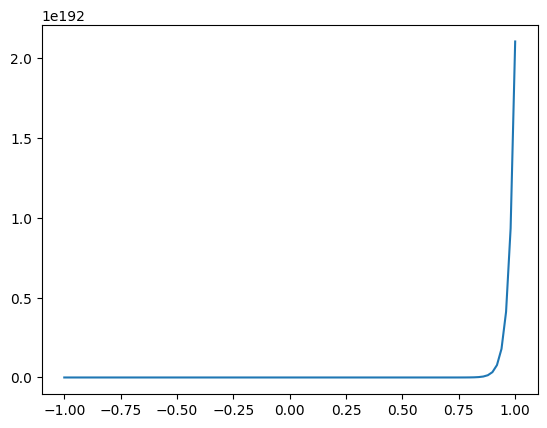

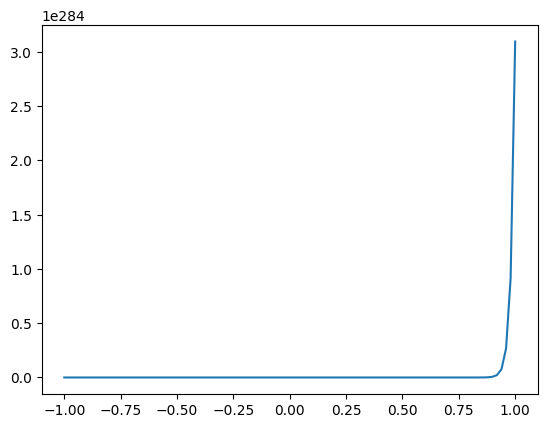

In [17]:
#Calculamos el error polinomio de hermit
def err(n, x_point):
  e = []
  f_1 = 1
  for i in range(n):
    plt.figure()
    x_points = np.linspace(-1,1, x_point[i])
    for j in range(len(x_points)):
      f_1 *= (x - x_points[j])**2
    dif_n_f = sp.diff(f, x, 2*n +2).subs(x, rd.uniform(-1, 1))
    e.append((1/mt.factorial(2*n +2))*dif_n_f*f_1)
    plt.plot(dominio, np.abs([e[i].subs(x, x_val) for x_val in domain]) )
  return e

resto = np.abs(err(len(x_point), x_point))


El polinomio de hermite converge mucho más rapidamente y es más estable en los extremos.

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato.

3. Representar el polinomio de interpolación de Lagrange y de Hermite en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?



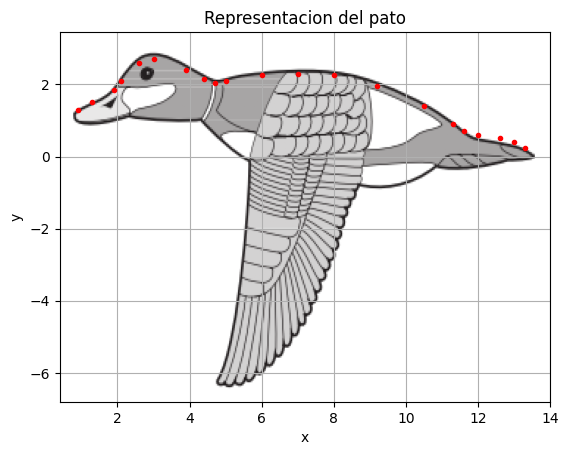

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coinsidan con x y y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()